In [22]:
# You have to install this libs only once by running this cell without #

#!pip install nltk
#!pip install gensim

Import one specific JSON

In [1]:
import json

with open('C:\\Users\\Admin\\Documents\\Teamprojekt- Ai knowlage base\\Project_git\\Extraction\\data\\https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Farticle%2Fdoi%2F10.1016%2FS0933-3657%2801%2900089-6.json') as json_file:
    data = json.load(json_file)
    description = data["coredata"]["dc:description"]
    

Method to import all JSONs of a Directory. Option to load only the abstract

In [2]:
from pathlib import Path
import json
cat = []

def openJSONFiles(fileString, onlyAbstract=False):
    jsonReturn = []
    path = Path(fileString)
    for path in path.iterdir():
        if path.is_file():
            with open(path) as json_file:
                if onlyAbstract:
                    tempJson = json.load(json_file)
                    jsonReturn.append(tempJson["coredata"]["dc:description"])  
                    # tempp !!
                    cat.append(tempJson["subfield"])
                    #
                else:
                    jsonReturn.append(json.load(json_file))
              
    return jsonReturn

Exmaple

In [3]:
jsons = openJSONFiles('C:\\Users\\Admin\\Documents\\Teamprojekt- Ai knowlage base\\Project_git\\Preprocessing_Clustering\\manual',True)

In [13]:
jsons[9]

['Epidemiology']

Methods for tokenization, removment of stopwords and stemming

In [78]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
import re, string
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from collections import defaultdict
from collections.abc import Iterable
from nltk import ngrams
import pandas as pd


def tokenize(text, sentenceSeperate=False, includePunctation= False, excludeSpecPuct =[]):
    data = [] 
    #intern functions
    def withPunctation(text):
        temp = [] 
        #delete unwanted punctuation
        for delPunct in excludeSpecPuct:
            text = text.replace(delPunct, " ")
        #help tokenization with replacing some untokenized punctations
        for puct in ["-","/","—"]:
            text = text.replace(puct, " "+puct+" ")
         # tokenize the sentence into words 
        for j in word_tokenize(text): 
            temp.append(j)
        return temp
    def withoutPunctation(text):
        token_pattern = re.compile(r"(?u)\b\w\w+\b") # split on whitespace (and remove punctation)
        return token_pattern.findall(text)
    
    text = text.lower()
    if sentenceSeperate:
        # iterate through each sentence in the file 
        for sentence in sent_tokenize(text): 
            if includePunctation:
                data.append(withPunctation(sentence))
            else:
                data.append(withoutPunctation(sentence))
    else:
        if includePunctation:
            data = withPunctation(text)
        else:
            data = withoutPunctation(text)
    
    return data
     

def removeStopwords(wordArray):
    
    my_stopwords = set(stopwords.words('english'))
    withoutStopwords = []
    
    #test if its a list of words or a list of sentences with words
    if isinstance(wordArray[0], Iterable)and not isinstance(wordArray[0], str):
        for sentence in wordArray:
            withoutStopwords.append(removeStopwords(sentence))
            
    else:        
        for item in wordArray:
            if item not in my_stopwords:
                withoutStopwords.append(item)
    return withoutStopwords

def applyStemming(wordArray):
    stemmer = PorterStemmer()
    stems = []
    
    #test if its a list of words or a list of sentences with words
    if isinstance(wordArray[0], Iterable)and not isinstance(wordArray[0], str):
        for sentence in wordArray:
            stems.append(applyStemming(sentence))
    else:       
        for item in wordArray:
            stems.append(stemmer.stem(item))
    return stems


def applyLemmatizing(wordArray):
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV   
    
    #intern function
    def lemmazizeText(text):
        temp = []
        for token, tag in pos_tag(text):
            temp.append(lemma_function.lemmatize(token, tag_map[tag[0]]))
        return temp

            
    lemma_function = WordNetLemmatizer()
    baseWords = []
    if isinstance(wordArray[0], Iterable)and not isinstance(wordArray[0], str):
        for sentence in wordArray:
            baseWords.append(lemmazizeText(sentence))
    else:
        baseWords =lemmazizeText(wordArray)
     
    return baseWords

def addNGram(wordArray, NGramLength=2):
    holetext= wordArray
    temp = []
    if len(wordArray)>0 and isinstance(wordArray[0], Iterable)and not isinstance(wordArray[0], str):
        print("drin")
        for sentence in wordArray:
            temp.append(' '.join(sentence))
        holetext = (' '.join(temp)).split()
    nGrams = list(ngrams(holetext, NGramLength))
    
    # make nGram from two words to one 
    nGramsFull = pd.Series(nGrams).apply(lambda row: ' '.join(row))
    wordArrayCopy = wordArray.copy()
    wordArrayCopy.extend(nGramsFull)
    return (wordArrayCopy)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
type(description)

str

Example

In [5]:
# import time
# firstTime = time.time()
# print("Original Text:\n",description)

# description_P1 = tokenize(description)
# print("\nAfter Tokenization:\n",description_P1)

# description_P2 = removeStopwords(description_P1)
# print("\nAfter Stopword removal:\n",description_P2)

# description_P3 = applyStemming(description_P2)
# print("\nAfter Stemming:\n",description_P3)

# description_P3_1 = applyLemmatizing(description_P2)
# print("\nAfter Lemmatization (with previous stopword removal\n",description_P3_1)

# description_P3_2 = removeStopwords(applyLemmatizing(description_P1))
# print("\nAfter Lemmatization (with subsequent stopword removal\n",description_P3_2)

# description_P4 = addNGram(description_P3_2)
# print("\nAfter adding NGrams\n",description_P4)
# print ("--- %s seconds ---" % round(time.time()-firstTime,4))

In [84]:
import time
firstTime = time.time()
abstractsPro = []
abstractsUsed = []
i=0
for abstract in jsons:
    if abstract is not None:
        #abstractsPro.append(applyLemmatizing(removeStopwords(tokenize(abstract))))
        abstractsPro.append(tokenize(abstract, includePunctation=True,excludeSpecPuct = ["(",")","[","]","{","}",'"',"’", "”", "“","—"]))
        abstractsUsed.append(abstract)
        i= i+1
print(i," out of ",len(jsons)," abstracts cound be found and are converted")
print ("--- %s seconds ---" % round(time.time()-firstTime,4))

44  out of  44  abstracts cound be found and are converted
--- 0.1479 seconds ---


# doc2vec

create wordlist of all inputs togehter

In [49]:
# Source: https://www.kaggle.com/christofhenkel/how-to-preprocessing-when-using-embeddings/comments
from tqdm import tqdm
tqdm.pandas()

def build_vocab(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

C:\Users\Admin\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [85]:
vocab = build_vocab(abstractsPro)

100%|████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<00:00, 8806.10it/s]


Load the model and the keyedVector

In [11]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
import gensim.models as g

firstTime = time.time()
#documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(abstractsPro)]
modelLNK = "C:\\Users\\Admin\\Downloads\\enwiki_dbow\\doc2vec.bin"


#inference hyper-parameters
start_alpha=0.01
infer_epoch=1000
 
#load model

model = g.Doc2Vec.load(modelLNK)
#model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

#embeddings_index = KeyedVectors.load_word2vec_format(modelLNK, binary=True)
embeddings_index = model.wv


# # Save file and load it again
# fname = get_tmpfile("my_doc2vec_model")

# model.save(fname)
# model = Doc2Vec.load(fname)  # you can continue training with the loaded model!
# #delete traingmode (save memmory)
# model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
print ("--- %s seconds ---" % round(time.time()-firstTime,4))

--- 30.3281 seconds ---


In [17]:
embeddings_index = model.wv

In [13]:
embeddings_index

compares the word of the embedding with the words of our text

In [51]:
# source https://www.kaggle.com/christofhenkel/how-to-preprocessing-when-using-embeddings/comments
import operator 

def check_coverage(vocab,embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:

            oov[word] = vocab[word]
            i += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x

In [86]:
oov = check_coverage(vocab,embeddings_index)

100%|██████████████████████████████████████████████████████████████████████████| 2357/2357 [00:00<00:00, 138738.84it/s]


Found embeddings for 98.13% of vocab
Found embeddings for  99.32% of all text


In [87]:
oov[:20]

[('esns', 5),
 ('ldct', 5),
 ('nlst', 5),
 ('dateness', 4),
 ('unclustered', 4),
 ('dbns', 4),
 ('svdd', 4),
 ('cnns', 4),
 ('fmultimoora', 3),
 ('2019.', 2),
 ('10,865', 2),
 ('0.758', 2),
 ('2020.', 1),
 ('multidisplinary', 1),
 ('reskill', 1),
 ('gmms', 1),
 ('531.', 1),
 ('ophtha', 1),
 ('inbreast', 1),
 ('microaneurysm', 1)]

In [88]:
punctuationList = string.punctuation 
punctuationList = punctuationList+"’" + "”" + "“"+"—"
for punctuation in punctuationList:
    print(punctuation, " in the embedding: ",punctuation in embeddings_index)

!  in the embedding:  True
"  in the embedding:  False
#  in the embedding:  True
$  in the embedding:  True
%  in the embedding:  True
&  in the embedding:  True
'  in the embedding:  True
(  in the embedding:  False
)  in the embedding:  False
*  in the embedding:  True
+  in the embedding:  True
,  in the embedding:  True
-  in the embedding:  True
.  in the embedding:  True
/  in the embedding:  True
:  in the embedding:  True
;  in the embedding:  True
<  in the embedding:  True
=  in the embedding:  True
>  in the embedding:  True
?  in the embedding:  True
@  in the embedding:  True
[  in the embedding:  False
\  in the embedding:  True
]  in the embedding:  False
^  in the embedding:  True
_  in the embedding:  True
`  in the embedding:  True
{  in the embedding:  False
|  in the embedding:  True
}  in the embedding:  False
~  in the embedding:  True
’  in the embedding:  False
”  in the embedding:  False
“  in the embedding:  False
—  in the embedding:  False


In [97]:
for i in range(20):
    print(embeddings_index.index2entity[i])
#TODO: -LRB- and -RRB- are currently used instead of "(" and ")" .... also  ” to " .... also -- has to has a meaning (maybe a placehoder for numbers like in https://www.kaggle.com/christofhenkel/how-to-preprocessing-when-using-embeddings/comments)

the
,
.
of
and
in
a
to
was
''
``
is
for
-rrb-
-lrb-
as
on
with
by
he


In [139]:
#vector = model.infer_vector(["system", "und jetzt"]) 
#model.docvecs.most_similar(5)

In [98]:
firstTime = time.time()
vectors = []
# for x,y in documents:
#     vectors.append(model.docvecs[y[0]]) 
for text in abstractsPro:
    vectors.append(model.infer_vector(text))
print ("--- %s seconds ---" % round(time.time()-firstTime,4))

--- 148.2506 seconds ---


In [104]:
vectors[1]

array([ 1.60376951e-02, -2.35308498e-01, -1.18354857e-01, -1.02248840e-01,
       -5.22841476e-02,  9.46073458e-02,  4.57842015e-02, -3.23922047e-03,
       -1.47295386e-01,  1.06221683e-01, -2.64518738e-01, -2.12970302e-01,
       -7.18091428e-02, -2.32401431e-01,  8.43367726e-02,  1.38983846e-01,
       -1.05704449e-01,  3.97593006e-02,  3.24011147e-02, -8.67493600e-02,
        1.78713784e-01, -7.66739156e-03,  6.42504692e-02, -9.14003104e-02,
        4.45874035e-02,  3.02400198e-02, -6.46890774e-02, -1.11423209e-02,
       -1.39129207e-01, -2.49461681e-01, -3.26337099e-01,  1.42127663e-01,
       -5.24813570e-02, -1.39265969e-01,  6.00566417e-02, -2.96140909e-01,
        2.13818308e-02,  3.86159182e-01,  5.88212609e-02, -3.91192036e-03,
       -4.20305990e-02,  7.99349919e-02,  3.35499048e-02,  1.10244542e-01,
        2.61178464e-01, -4.65880334e-02,  8.04468840e-02,  2.47356459e-01,
        2.46205796e-02, -5.98564111e-02, -1.92814648e-01,  8.30861703e-02,
        6.16291203e-02, -

In [183]:
# from sklearn.manifold import TSNE
# import pandas as pd

# tsne = TSNE(n_components=2, random_state=30)

# matrix_2D = tsne.fit_transform(vectors)
# points = pd.DataFrame(matrix_2D,columns=["x","y"])
# points["word"]= range(52)

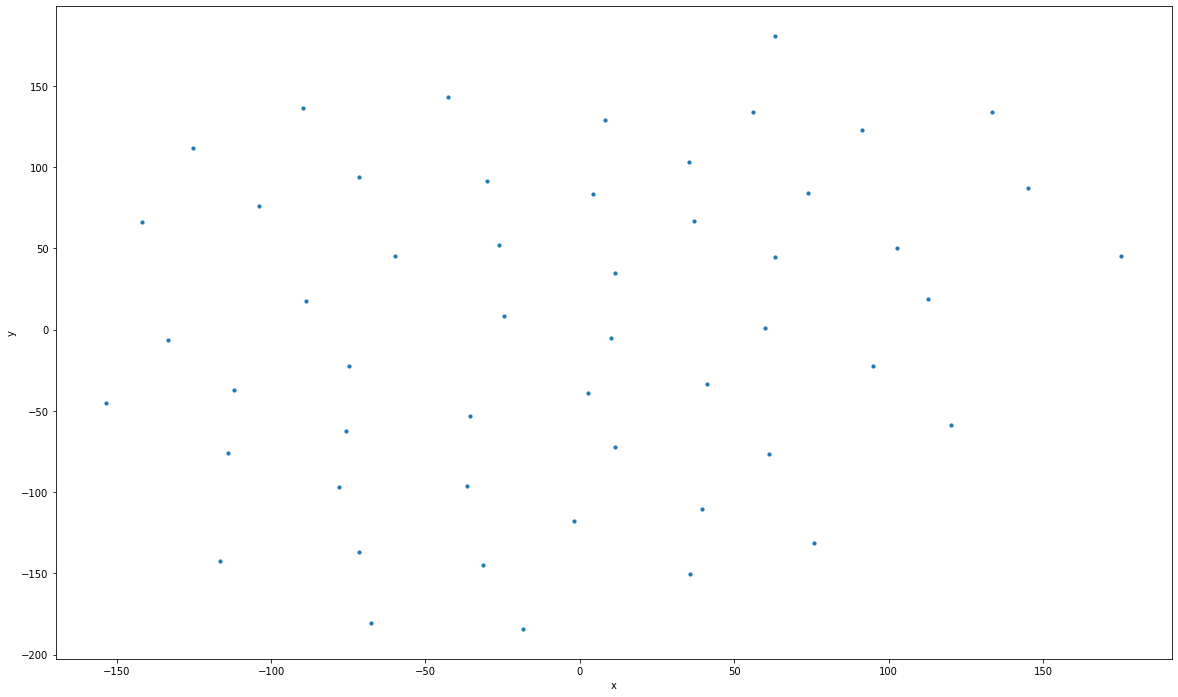

In [203]:
# points.plot.scatter("x","y",s=10, figsize= (20,12))

# Bag of words

Function for calling bag of words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Term Frequency (TF) and TF-IDF 
#useInverse = True = TF-IDF else TF

def bagOfWords(docs, useInverse,preProcessFunc,min_df=0.1, max_df=0.3): #procentual or absolute is a valide input
    if not useInverse:
        vectorizer = TfidfVectorizer(use_idf=False, norm='l1',tokenizer = preProcessFunc,min_df=min_df, max_df=max_df)
    else:
        vectorizer = TfidfVectorizer(tokenizer = preProcessFunc,min_df=min_df, max_df=max_df)
    matrix = vectorizer.fit_transform(docs)
    return pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
def sumPreprocessBoW(text):
    return applyLemmatizing(removeStopwords(tokenize(text)))

firstTime = time.time()
vectorsBoW = bagOfWords(cutHotelData, True, sumPreprocessBoW)
print ("--- %s seconds ---" % round(time.time()-firstTime,4))

In [ ]:
vectorsBoW

# Clustering

In [109]:
from sklearn.cluster import KMeans
firstTime = time.time()
kmeans = KMeans(n_clusters=4, random_state=0).fit(vectors)
print ("--- %s seconds ---" % round(time.time()-firstTime,4))

--- 1.028 seconds ---


In [122]:
clusterResults = kmeans.labels_
print(clusterResults,"\n")
difCluster = pd.Series(clusterResults).value_counts()
print("Ammmount of clusters:\n", len(difCluster),"\n")
print("Ammount of paper per cluster:\n", difCluster,"\n")

papersPerCluster = {}
for cluster in range(len(difCluster)):
    papersPerCluster[cluster] = pd.Series(abstractsUsed)[kmeans.labels_==cluster]

[3 0 3 0 1 0 0 1 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 0 1 0 3 3 0 3 3 3 2 3 3 3 0
 0 0 0 0 0 0 1] 

Ammmount of clusters:
 4 

Ammount of paper per cluster:
 3    23
0    14
1     6
2     1
dtype: int64 



In [123]:
papersPerCluster[0]

1     \n               Abstract\n               \n  ...
3     \n               \n                  Artificia...
5     \n               Abstract\n               \n  ...
6     \n               Abstract\n               \n  ...
23    \n               Abstract\n               \n  ...
25    \n               Abstract\n               \n  ...
28    \n               Abstract\n               \n  ...
36    \n               Abstract\n               \n  ...
37    \n               \n                  The AUR A...
38    \n               \n                  Artificia...
39    \n               Abstract\n               \n  ...
40    \n               Abstract\n               \n  ...
41    \n               Abstract\n               \n  ...
42    \n               Abstract\n               \n  ...
dtype: object